# Chart Library Notebook

This notebook will begin the basis for production level chart library using the agmktdb.

In [17]:
import os

# Data science
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine
import psycopg2
import cattle_cycle_pkg.nass as nass
import cattle_cycle_pkg.env_vars as env_vars


print('Libraries imported!!')

Libraries imported!!


# Create SELECT statement to pull raw data

In [18]:
# create sql connection
user = env_vars.mktdb_user()
password = env_vars.mktdb_passwd()
server = env_vars.mktdb_server()


connection_string = f'postgresql://{user}:{password}@{server}/mktdb'
eng = create_engine(connection_string)
conn = eng.connect()

In [ ]:
select_stmt = '''
SELECT *
FROM nass_crops_fmt
WHERE 
    "SOURCE_DESC" in ('SURVEY')
    AND "COMMODITY_DESC" in ('CORN')
    AND "PRODN_PRACTICE_DESC" in ('ALL PRODUCTION PRACTICES')
    AND "UTIL_PRACTICE_DESC" in ('GRAIN')
    AND "STATISTICCAT_DESC" in ('YIELD')
    AND "AGG_LEVEL_DESC" in ('NATIONAL')
    AND "REFERENCE_PERIOD_DESC" in ('YEAR')

'''

df = pd.read_sql(select_stmt, con = conn)

# Manimpulate data for data visualization

In [20]:
df['date'] = df['YEAR'].astype('str') + '-09-01'
df['date'] = pd.to_datetime(df['date'])

# Create Visualziation and save image to folder

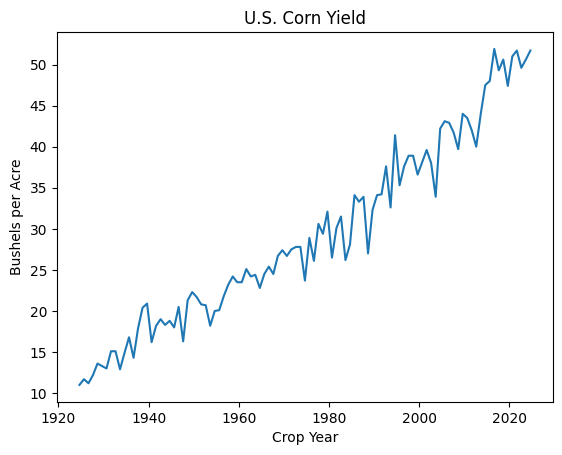

In [21]:
plt.subplot()
sns.lineplot(data=df, x='date', y='VALUE')
plt.title('U.S. Corn Yield')
plt.ylabel('Bushels per Acre')
plt.xlabel('Crop Year')
plt.show()